In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'
ds=pd.read_csv(url)
print(ds.head(5))
ds.describe()


    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [3]:
X = ds.iloc[:, [1,6]].values
Y = ds.iloc[:, 0].values

In [4]:
ds['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

**Min Value of mpg=9 and max =466**

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

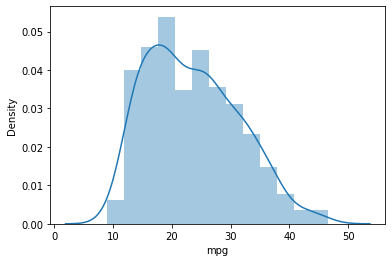

In [5]:
sns.distplot(ds['mpg'])

#data is moderately skewed to the right
#the number of cars having low mpg s more than cars having high mpg

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

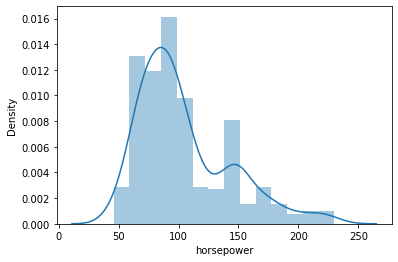

In [6]:
sns.distplot(ds['horsepower'])

<AxesSubplot:xlabel='model-year', ylabel='mpg'>

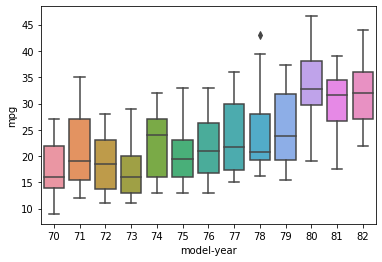

In [7]:
sns.boxplot(x='model-year', y='mpg', data=ds)

**The mpg of cars have improved over the years**

<AxesSubplot:>

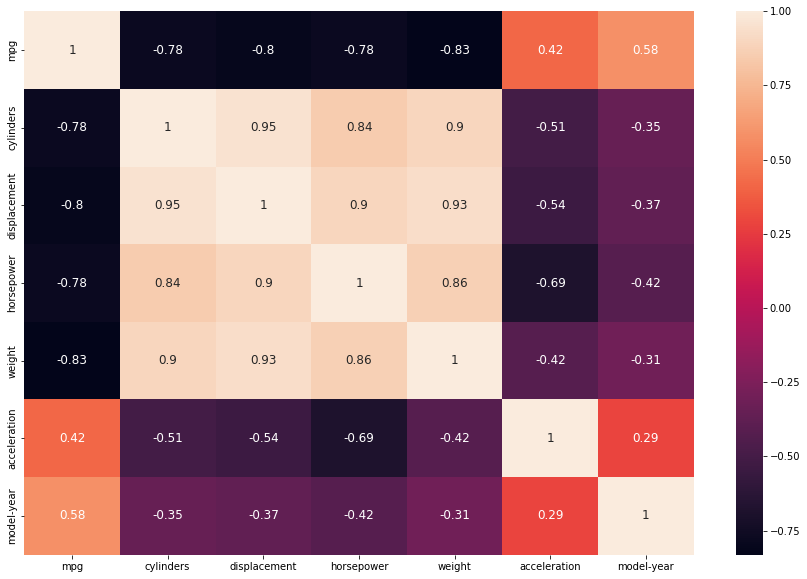

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),annot=True,annot_kws={"size":12})

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=200,random_state=12)
forest_reg.fit(X_train, y_train)






RandomForestRegressor(n_estimators=200, random_state=12)

In [42]:
print("Training accuracy: ", forest_reg.score(X_train, y_train))

Training accuracy:  0.774325335667923


In [43]:
y_pred = forest_reg.predict(X_test)

print("Testing accuracy: ", forest_reg.score(X_test, y_test))

Testing accuracy:  0.8114964014246551


In [13]:
from sklearn.metrics import mean_squared_error
forest_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE: ",forest_rmse)




RMSE:  3.472203652961887
